# Data Science Decal Day 8: Image Classification with CNNs in Keras 

In [1]:
import mnist_reader
from IPython.display import Image
import numpy as np
import matplotlib.gridspec as gridspec
!pip install keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')



Using TensorFlow backend.


### Data preparation 

In [2]:
# Import the data
X_train, y_train = mnist_reader.load_mnist('./data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('./data/fashion', kind='t10k')

# Convert to 28 x 28
X_train = X_train.reshape(60000, 28, 28)
X_test = X_test.reshape(10000, 28, 28)

### Visualize FashionMNIST

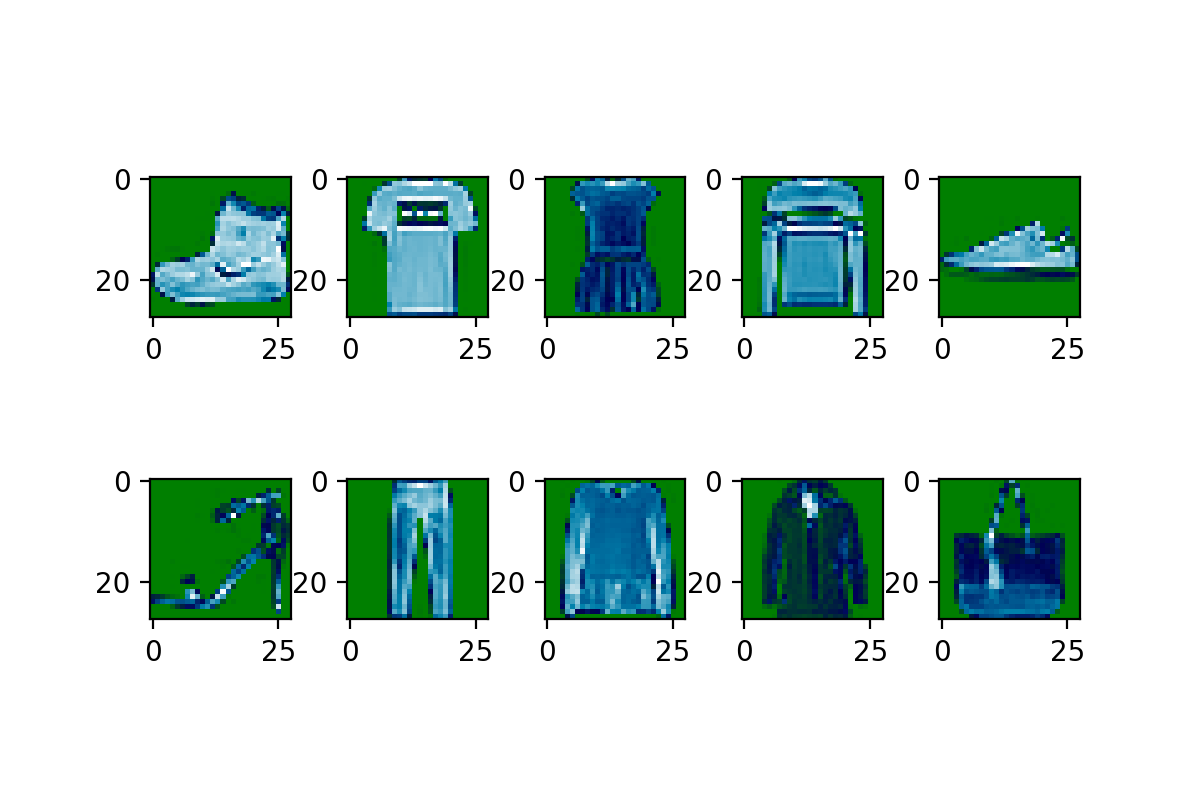

In [3]:
# Visualize some images
ten_classes = X_train[([0, 1, 3, 5, 6, 8, 16, 18, 19, 35])]
fig, axs = plt.subplots(2,5)
axs = axs.ravel()
for i in range(len(ten_classes)):
    axs[i].imshow(ten_classes[i], cmap = 'ocean')
plt.subplots_adjust(wspace = 0.4, hspace = 0)
plt.savefig('classes.png', dpi = 200)

Image(filename='classes.png') 

In [4]:
# Separate train and validation sets
X_train, y_train, X_val, y_val = X_train[0:16000], y_train[0:16000], X_train[16000:20000], y_train[16000:20000]
X_train, y_train = X_train.reshape(16000, 28, 28, 1), to_categorical(y_train)
X_val, y_val = X_val.reshape(4000, 28, 28, 1), to_categorical(y_val)

### Building a convolutional neural network in Keras 

In [5]:
# Initialize variables
NUM_FILTERS1 = 8
NUM_FILTERS2 = 16
NUM_FILTERS3 = 32
NUM_DENSE = 256
FILTER_SIZE = 3
POOL_SIZE = 2
DROPOUT_RATE = 0.3

# Initialize model
model = Sequential()
# Chunk 1
model.add(Conv2D(filters = NUM_FILTERS1, 
                 kernel_size = (FILTER_SIZE, FILTER_SIZE),
                 activation = 'relu', 
                 padding = 'same', 
                 input_shape = (28, 28, 1)))
model.add(MaxPooling2D(POOL_SIZE, POOL_SIZE))
# Chunk 2
model.add(Conv2D(filters = NUM_FILTERS2,
                 kernel_size = (FILTER_SIZE, FILTER_SIZE),
                 activation = 'relu', 
                 padding = 'same'))
model.add(MaxPooling2D(POOL_SIZE, POOL_SIZE))
# Chunk 3
model.add(Conv2D(filters = NUM_FILTERS3,
                 kernel_size = (FILTER_SIZE, FILTER_SIZE),
                 activation = 'relu', 
                 padding = 'same'))
model.add(MaxPooling2D(POOL_SIZE, POOL_SIZE))
# Flatten
model.add(Flatten())
model.add(Dense(NUM_DENSE, activation = 'relu'))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(10, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
__________

In [6]:
# Compile and train model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 32, validation_data = (X_val, y_val), epochs = 10)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 8s - loss: 0.8312 - acc: 0.7361 - val_loss: 0.5104 - val_acc: 0.8133
Epoch 2/10
16000/16000 [==============================] - 7s - loss: 0.4468 - acc: 0.8360 - val_loss: 0.4473 - val_acc: 0.8390
Epoch 3/10
16000/16000 [==============================] - 7s - loss: 0.3803 - acc: 0.8616 - val_loss: 0.4282 - val_acc: 0.8470
Epoch 4/10
16000/16000 [==============================] - 7s - loss: 0.3314 - acc: 0.8769 - val_loss: 0.4102 - val_acc: 0.8540
Epoch 5/10
16000/16000 [==============================] - 6s - loss: 0.2973 - acc: 0.8863 - val_loss: 0.4034 - val_acc: 0.8558
Epoch 6/10
16000/16000 [==============================] - 8s - loss: 0.2771 - acc: 0.8952 - val_loss: 0.4381 - val_acc: 0.8423
Epoch 7/10
16000/16000 [==============================] - 7s - loss: 0.2504 - acc: 0.9036 - val_loss: 0.3934 - val_acc: 0.8642
Epoch 8/10
16000/16000 [==============================] - 7s -

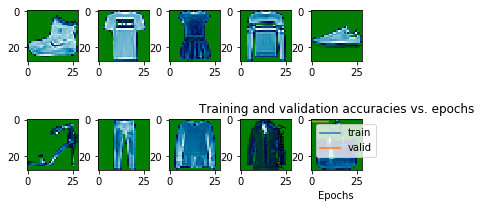

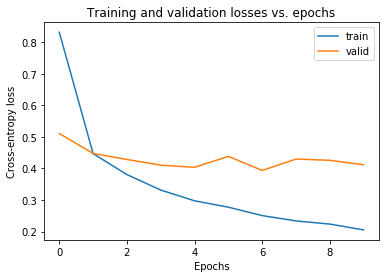

In [7]:
# Examine the training process
history.history.keys()
train_acc = history.history['acc']
valid_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_acc)
plt.plot(valid_acc)
plt.legend(['train', 'valid'], loc='upper left')
plt.title("Training and validation accuracies vs. epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['train', 'valid'], loc='upper right')
plt.title("Training and validation losses vs. epochs")
plt.xlabel("Epochs")
plt.ylabel("Cross-entropy loss")
plt.show()